# About MediaPipe

[**MediaPipe**](https://developers.google.com/mediapipe) is an open-source framework developed by Google that provides a set of tools and machine learning models for building applications involving real-time perception of human gestures, poses, and other objects from video or camera input. It was created to make it easier for developers to build applications that can understand and interpret the visual world in real-time.

MediaPipe offers a range of pre-trained models and pipelines for tasks such as:

1. **Hand Tracking:** Detecting and tracking the movement and position of hands in videos or camera feeds.

2. **Face Detection and Recognition:** Identifying and tracking faces, recognizing facial landmarks, and even estimating facial expressions.

3. **Pose Estimation:** Estimating the 2D and 3D pose of a person or object within the camera view. This can be used for applications like fitness tracking, dance recognition, and more.

<p align="center">
<img src="https://developers.google.com/static/mediapipe/images/solutions/examples/hand_gesture.png" alt="facial-landmarks-python-points.jpg" height="100"/><img src="https://editor.analyticsvidhya.com/uploads/84458468-facial-landmarks-python-points.jpg" alt="facial-landmarks-python-points.jpg" height="100"/><img src="https://developers.google.com/static/mediapipe/images/solutions/examples/pose_detector.png" alt="facial-landmarks-python-points.jpg" height="100"/>
</p>

MediaPipe provides pre-trained models and inference pipelines that can be easily integrated into various applications, including mobile apps, desktop software, web applications, and more. It also supports a variety of platforms, including Android, iOS, Windows, Linux, and macOS.

Developers can use the MediaPipe framework along with their preferred programming languages (such as Python, C++, or JavaScript) to create custom applications that leverage real-time visual perception and understanding. It has gained popularity in fields like computer vision, augmented reality, virtual reality, and human-computer interaction due to its flexibility and ease of use.

In [1]:
# Install the dependencies:
# !pip install -r requirements.txt

In [2]:
from utils import *

In [3]:
video_path = "demo_data/demo.mov"

tf = TraceFace(video_path, data_file_name="demo_data/results")

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [4]:
tf.trace(start_frame=0, end_frame=10)

100%|██████████| 10/10 [00:01<00:00,  9.20it/s]


In [5]:
# after tracing, the results are now saved in `demo_data/results.csv`
import pandas as pd
df = pd.read_csv("demo_data/results.csv", index_col=0)
df.head(10)

,frame,landmark,x,y,z
0,0,0,-0.000126,-0.009231,-0.017112
1,0,1,-0.001188,-0.044133,-0.032660
2,0,2,-0.000627,-0.034365,-0.017002
3,0,3,-0.006610,-0.080028,-0.025318
4,0,4,-0.001224,-0.054752,-0.034936
5,0,5,-0.001166,-0.069032,-0.032809
6,0,6,-0.000829,-0.103190,-0.017263
7,0,7,-0.045482,-0.112972,0.006230
8,0,8,-0.000274,-0.128999,-0.013606
9,0,9,-0.000076,-0.141944,-0.015035


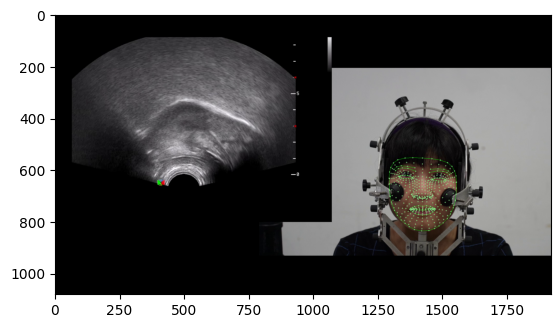

In [6]:
tf.plot(0, draw=True) # plot a specific frame

In [7]:
tf.get_result(0) # directly get the result of a specific frame

{0: {'x': 0.739607036113739,
  'y': 0.687012255191803,
  'z': -0.01632717251777649},
 1: {'x': 0.7385454773902893,
  'y': 0.6521097421646118,
  'z': -0.03187552094459534},
 2: {'x': 0.7391061186790466,
  'y': 0.6618782877922058,
  'z': -0.016217131167650223},
 3: {'x': 0.7331234812736511,
  'y': 0.6162150502204895,
  'z': -0.024533482268452644},
 4: {'x': 0.7385088205337524,
  'y': 0.6414914727210999,
  'z': -0.03415140509605408},
 5: {'x': 0.7385672330856323,
  'y': 0.6272106170654297,
  'z': -0.032024938613176346},
 6: {'x': 0.7389041185379028,
  'y': 0.593052864074707,
  'z': -0.01647886075079441},
 7: {'x': 0.6942510604858398,
  'y': 0.5832706093788147,
  'z': 0.007014709059149027},
 8: {'x': 0.7394593954086304,
  'y': 0.5672445297241211,
  'z': -0.012821044772863388},
 9: {'x': 0.7396566867828369,
  'y': 0.5542994141578674,
  'z': -0.014250475913286209},
 10: {'x': 0.7393774390220642,
  'y': 0.5144498348236084,
  'z': -0.009215873666107655},
 11: {'x': 0.7396756410598755,
  'y': 0

In [8]:
tf.results_to_dataframe(5, 10) # convert results of specific frames

Exising data file `demo_data/results.csv` found. Using those results.


  0%|          | 0/10 [00:00<?, ?it/s, landmark=8, remain=1]

100%|██████████| 10/10 [00:00<00:00, 1375.86it/s]


,frame,landmark,x,y,z
0,0,0,-0.000126,-0.009231,-0.017112
1,0,1,-0.001188,-0.044133,-0.032660
2,0,2,-0.000627,-0.034365,-0.017002
3,0,3,-0.006610,-0.080028,-0.025318
4,0,4,-0.001224,-0.054752,-0.034936
...,...,...,...,...,...
4675,9,463,0.016739,-0.106006,0.000499
4676,9,464,0.013089,-0.103338,-0.003036
4677,9,465,0.011077,-0.101563,-0.007155
4678,9,466,0.045418,-0.105700,0.003549


## What if I only want to deal with an image?

In [9]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

In [10]:
image = cv2.imread("demo_data/demo.png")

In [11]:
drawingModule = mp.solutions.drawing_utils
faceModule = mp.solutions.face_mesh
circleDrawingSpec = drawingModule.DrawingSpec(thickness=1, circle_radius=1, color=(0,255,0))
lineDrawingSpec = drawingModule.DrawingSpec(thickness=1, color=(0,255,0))
with faceModule.FaceMesh(static_image_mode=True) as face:
    result = face.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

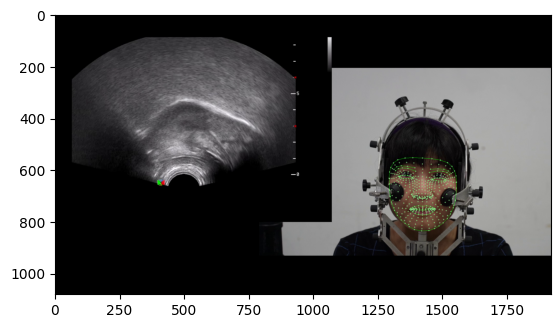

In [12]:
for faceLandmarks in result.multi_face_landmarks:
    drawingModule.draw_landmarks(image, faceLandmarks, faceModule.FACEMESH_CONTOURS, circleDrawingSpec, lineDrawingSpec)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [13]:
lips = json.load(open('utils/lip_landmarks.json'))
lips_all = lips['outer']['upper'] + lips['outer']['lower'] + lips['inner']['upper'] + lips['inner']['lower']

In [14]:
landmarks = {}
only_lips = True
for landmark_idx, landmark in enumerate(result.multi_face_landmarks[0].landmark):
    if only_lips and landmark_idx not in lips_all: continue
    landmarks[landmark_idx] = {
        'x': landmark.x,
        'y': landmark.y,
        'z': landmark.z
    }

In [15]:
landmarks

{0: {'x': 0.739607036113739,
  'y': 0.687012255191803,
  'z': -0.01632717251777649},
 13: {'x': 0.7394888997077942,
  'y': 0.6976012587547302,
  'z': -0.010317916981875896},
 14: {'x': 0.7397909164428711,
  'y': 0.7011813521385193,
  'z': -0.00994421262294054},
 17: {'x': 0.7395600080490112,
  'y': 0.7184092402458191,
  'z': -0.010695752687752247},
 37: {'x': 0.7315860390663147,
  'y': 0.6848044991493225,
  'z': -0.015450563281774521},
 39: {'x': 0.7236988544464111,
  'y': 0.6876270771026611,
  'z': -0.011788797564804554},
 40: {'x': 0.7190174460411072,
  'y': 0.6912570595741272,
  'z': -0.007191912271082401},
 61: {'x': 0.7137285470962524,
  'y': 0.6974210739135742,
  'z': 0.003051111940294504},
 78: {'x': 0.7174521088600159,
  'y': 0.6964510679244995,
  'z': 0.0009501875611022115},
 80: {'x': 0.7244278788566589,
  'y': 0.6962847709655762,
  'z': -0.004592896439135075},
 81: {'x': 0.7285916209220886,
  'y': 0.6965742111206055,
  'z': -0.007383596617728472},
 82: {'x': 0.73375028371810

In [16]:
data = {
    'landmark': [],
    'x': [],
    'y': [],
    'z': []
}
left_landmark = landmarks[78]
right_landmark = landmarks[308]
original = (left_landmark['x'] + right_landmark['x'])/2, (left_landmark['y'] + right_landmark['y'])/2, (left_landmark['z'] + right_landmark['z'])/2
            
for landmark_idx in landmarks:
    landmark = landmarks[landmark_idx]
    if (not only_lips) or (landmark_idx in lips_all):
        x, y, z = landmark['x'] - original[0], landmark['y'] - original[1], landmark['z'] - original[2]
                    
        data['landmark']+=[landmark_idx]
        data['x']+=[x]
        data['y']+=[y]
        data['z']+=[z]

df = pd.DataFrame(data)

In [17]:
df

,landmark,x,y,z
0,0,-0.000126,-0.009231,-0.017112
1,13,-0.000244,0.001358,-0.011102
2,14,0.000058,0.004938,-0.010729
3,17,-0.000173,0.022166,-0.011480
4,37,-0.008147,-0.011439,-0.016235
5,39,-0.016034,-0.008616,-0.012573
6,40,-0.020716,-0.004986,-0.007976
7,61,-0.026005,0.001178,0.002267
8,78,-0.022281,0.000208,0.000166
9,80,-0.015305,0.000042,-0.005377
